In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [30]:
df = pd.read_csv('monthly_milk_production.csv',index_col='date',parse_dates=True)


In [31]:
df.head()

,Production
date,
1998-01-01,589
1998-02-01,561
1998-03-01,640
1998-04-01,656
1998-05-01,727


In [32]:
df.tail()

,Production
date,
2021-09-01,843
2021-10-01,713
2021-11-01,711
2021-12-01,735
2022-01-01,808


In [33]:
df.index.freq='MS'

In [34]:
df.head()

,Production
date,
1998-01-01,589
1998-02-01,561
1998-03-01,640
1998-04-01,656
1998-05-01,727


<AxesSubplot:xlabel='date'>

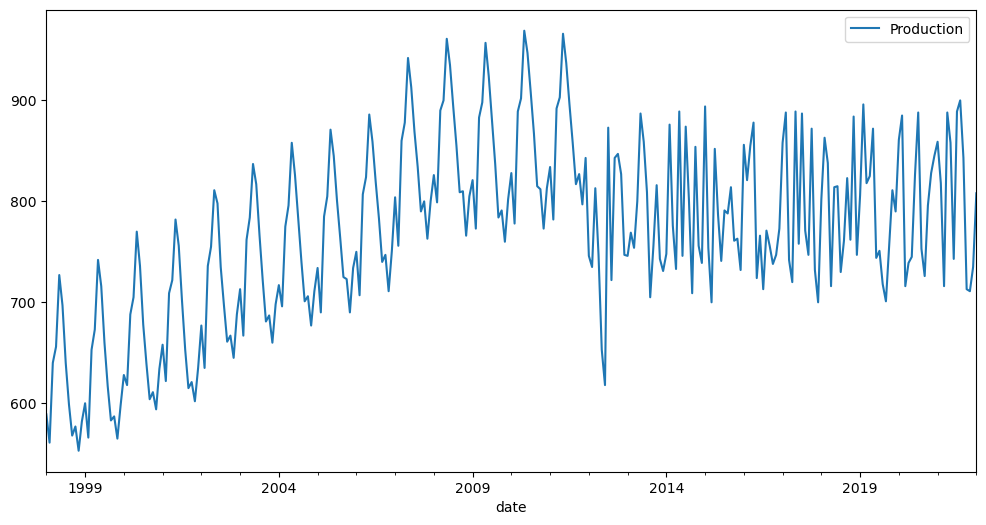

In [35]:
df.plot(figsize=(12,6))

In [36]:
#pip install statsmodels

In [45]:
from statsmodels.tsa.stattools import adfuller


In [47]:
# Assuming you have a pandas DataFrame 'data' with a column 'values' containing your data
# You can replace 'values' with the actual column name in your dataset

# Step 1: Check if the data is stationary
#result = adfuller(data['values'].dropna())
result = adfuller(df['Production'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -2.4386388049819816
p-value: 0.1311264664316797
Critical Values: {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}


In [48]:

# Step 2: Apply differencing to make the data stationary
df['Production'] = df['Production'].diff().dropna()



In [49]:
# Step 3: Check the stationarity of the differenced data
result_stationary = adfuller(df['Production'].dropna())
print('ADF Statistic (stationary data):', result_stationary[0])
print('p-value (stationary data):', result_stationary[1])
print('Critical Values (stationary data):', result_stationary[4])


ADF Statistic (stationary data): -13.640591349998765
p-value (stationary data): 1.6560207571366286e-25
Critical Values (stationary data): {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}


In [50]:
df.head()

,Production
date,
1998-01-01,NaN
1998-02-01,-28.0
1998-03-01,79.0
1998-04-01,16.0
1998-05-01,71.0


In [51]:
data = df.dropna()
data.head()

,Production
date,
1998-02-01,-28.0
1998-03-01,79.0
1998-04-01,16.0
1998-05-01,71.0
1998-06-01,-30.0


<AxesSubplot:xlabel='date'>

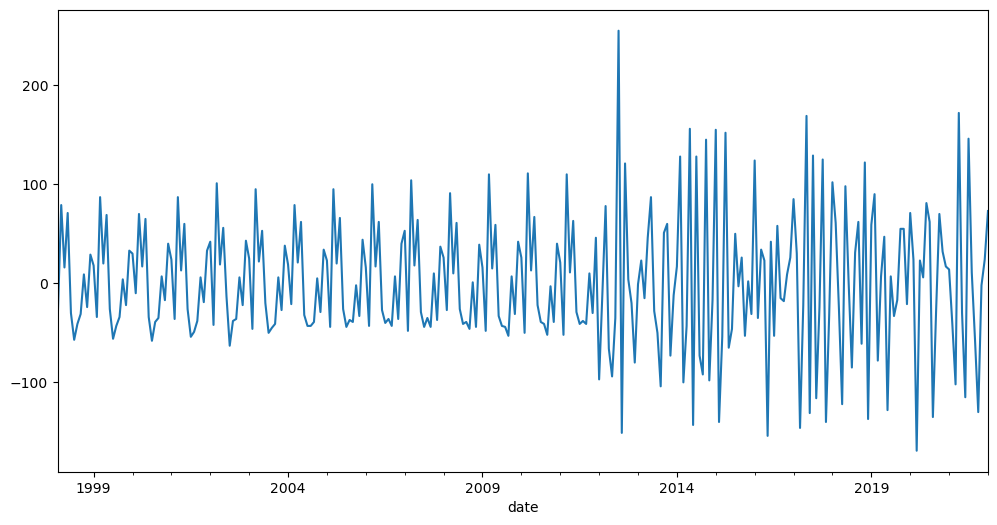

In [52]:
data['Production'].plot(figsize=(12,6))

In [53]:
import scipy 

In [54]:
#pip install statsmodels 

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

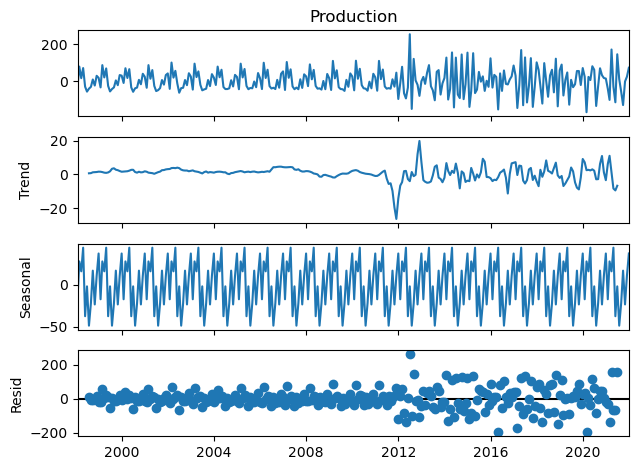

In [56]:
results = seasonal_decompose(data['Production'])
results.plot();

In [57]:
len(data)

288

In [58]:
train = data.iloc[:250]
test = data.iloc[250:]


In [59]:
#pip install sklearn

In [60]:
from sklearn import *

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [62]:
df.head(),df.tail()

(            Production
 date                  
 1998-01-01         NaN
 1998-02-01       -28.0
 1998-03-01        79.0
 1998-04-01        16.0
 1998-05-01        71.0,
             Production
 date                  
 2021-09-01       -57.0
 2021-10-01      -130.0
 2021-11-01        -2.0
 2021-12-01        24.0
 2022-01-01        73.0)

In [63]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [64]:
scaled_train[:10]

array([[0.30806846],
       [0.56968215],
       [0.41564792],
       [0.55012225],
       [0.30317848],
       [0.23716381],
       [0.27628362],
       [0.3007335 ],
       [0.39853301],
       [0.31784841]])

In [65]:
#conda install -c conda-forge keras


In [66]:
#conda env list


In [67]:
#from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [68]:
#from keras.preprocessing.sequence import TimeseriesGenerator

In [70]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [71]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.30806846 0.56968215 0.41564792]
Predict this y: 
 [[0.55012225]]


In [72]:
X.shape

(1, 3, 1)

In [73]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [74]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [75]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# fit model
model.fit(generator,epochs=200)

Epoch 1/200
 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2117

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0542
Epoch 2/200
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0302
Epoch 3/200
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0356
Epoch 4/200
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0285
Epoch 5/200
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0222
Epoch 6/200
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0278
Epoch 7/200
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0273
Epoch 8/200
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0242
Epoch 9/200
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0244
Epoch 10/200
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0254
Epoch 11/200
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0200
Epoch 12/200
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0251
Epoch 13/200
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0203
Epoch 14/200
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167
Epoch 15/200
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step -

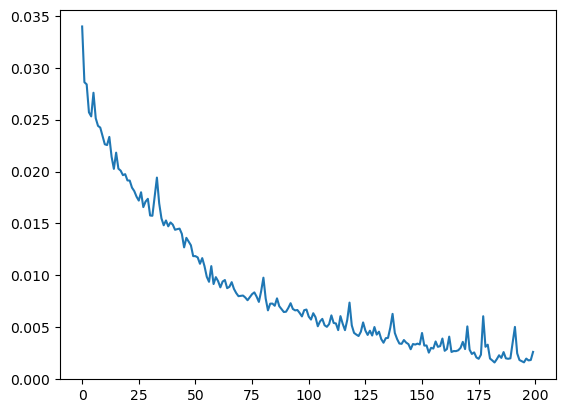

In [78]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [37]:
last_train_batch = scaled_train[-12:]

In [38]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [39]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 463ms/step


array([[0.20232469]], dtype=float32)

In [40]:
scaled_test[0]

array([0.04156479])

In [41]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 31ms/step


In [42]:
test_predictions

[array([0.20232469], dtype=float32),
 array([0.30695337], dtype=float32),
 array([0.51629436], dtype=float32),
 array([0.47584265], dtype=float32),
 array([0.3110384], dtype=float32),
 array([0.42232317], dtype=float32),
 array([0.29195607], dtype=float32),
 array([0.35133883], dtype=float32),
 array([0.44565526], dtype=float32),
 array([0.46785778], dtype=float32),
 array([0.31093124], dtype=float32),
 array([0.6160735], dtype=float32),
 array([0.20910415], dtype=float32),
 array([0.3181843], dtype=float32),
 array([0.48644182], dtype=float32),
 array([0.45169133], dtype=float32),
 array([0.28417313], dtype=float32),
 array([0.41773593], dtype=float32),
 array([0.24377733], dtype=float32),
 array([0.3279389], dtype=float32),
 array([0.43889406], dtype=float32),
 array([0.4469471], dtype=float32),
 array([0.29570445], dtype=float32),
 array([0.58608705], dtype=float32),
 array([0.13310987], dtype=float32),
 array([0.36120355], dtype=float32),
 array([0.41820973], dtype=float32),
 array

In [43]:
test.head()

,Production
date,
2018-12-01,-137.0
2019-01-01,59.0
2019-02-01,90.0
2019-03-01,-78.0
2019-04-01,7.0


In [44]:
true_predictions = scaler.inverse_transform(test_predictions)

In [45]:
test['Predictions'] = true_predictions

C:\Users\Skynet\AppData\Local\Temp\ipykernel_11096\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='date'>

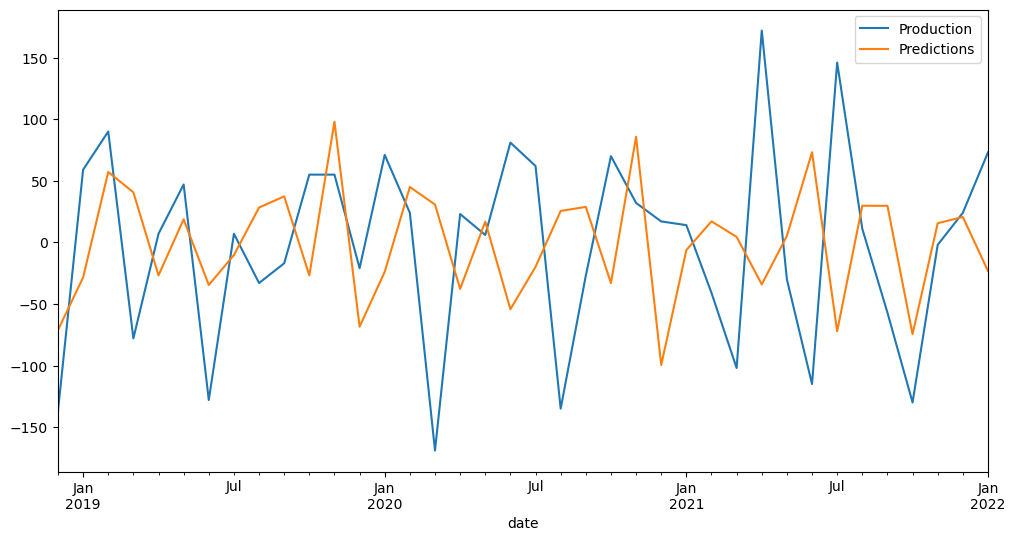

In [46]:
test.plot(figsize=(12,6))

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

96.25657869158513
